In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
# import seaborn as sns
# sns.set()

In [2]:
# Prepare DataFrame
df = pd.read_csv("Index2018.csv")
df.date = pd.to_datetime(df.date, dayfirst=True)
df.set_index('date', inplace=True)
df = df.asfreq('b')
df.fillna(method="ffill", inplace=True)
df = df[["spx"]]
df.rename(columns={'spx':'price'}, inplace=True);
df = df.iloc[:int(len(df)*0.8)]
df.head()

,price
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


## White Noise

In [3]:
wn = np.random.normal(loc=df.mean(), scale=df.std(), size=len(df))
df['wn'] = wn
df.describe()

,price,wn
count,5021.000000,5021.000000
mean,1091.651926,1102.335379
std,292.559287,287.622874
min,438.920000,-75.148655
25%,914.620000,916.468808
50%,1144.650000,1104.116910
75%,1316.280729,1293.341106
max,1570.252238,2129.388784


[]

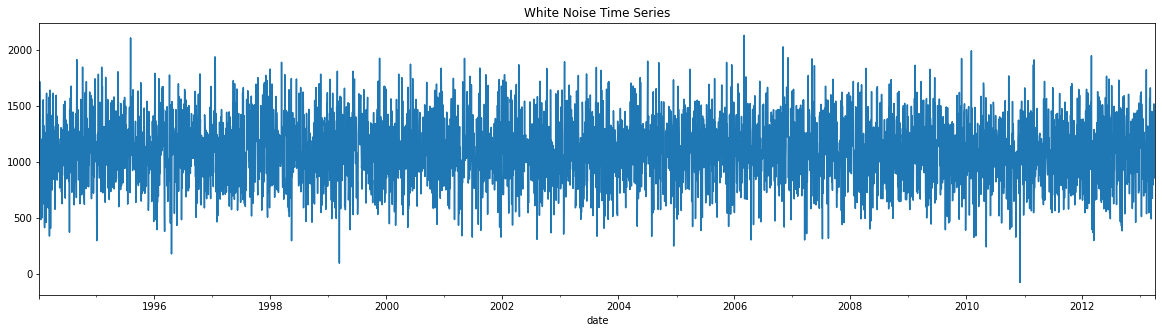

In [4]:
df.wn.plot(figsize=(20,5), title="White Noise Time Series")
plt.plot()

## Random Walk

In [5]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')

In [6]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [7]:
df['rw'] = rw.price
df.head()

,price,wn,rw
date,,,
1994-01-07,469.90,977.172359,1122.139662
1994-01-10,475.27,1717.343029,1080.347860
1994-01-11,474.13,1534.049839,1082.095245
1994-01-12,474.17,1073.784467,1083.639265
1994-01-13,472.47,1384.472817,1067.146255


[]

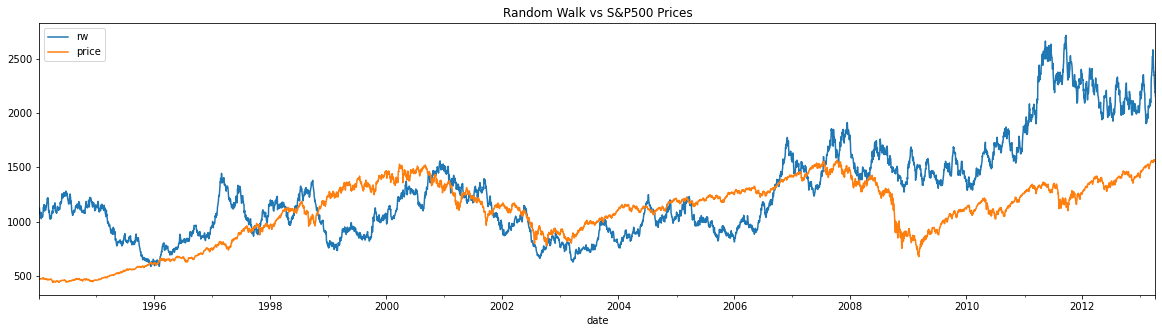

In [8]:
df.rw.plot(figsize=(20,5))
df.price.plot()
plt.legend(loc='upper left')
plt.title("Random Walk vs S&P500 Prices")
plt.plot()

## Stationarity

In [9]:
sts.adfuller(df.price)

(-1.7369847452352456,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [10]:
sts.adfuller(df.wn)

(-69.97656133636146,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70624.68834454776)

In [11]:
sts.adfuller(df.rw)

(-1.3286073927689726,
 0.6159849181617382,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## Stationarity

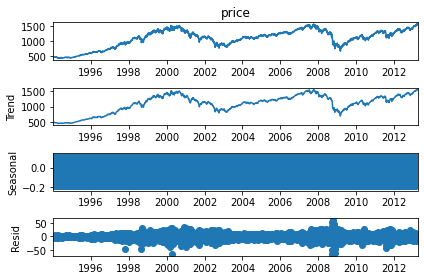

In [12]:
s_dec_additive = seasonal_decompose(df.price, model='additive')
s_dec_additive.plot()
plt.show()

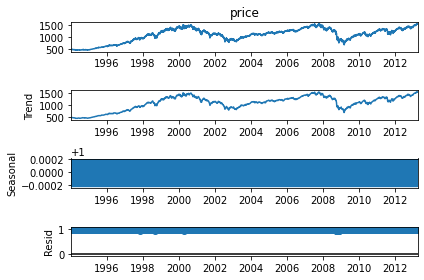

In [13]:
s_dec_mul = seasonal_decompose(df.price, model='multiplicative')
s_dec_mul.plot()
plt.show()

## ACF and PACF

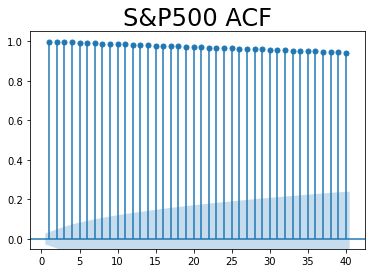

In [14]:
sgt.plot_acf(df.price, lags=40, zero=False)
plt.title("S&P500 ACF", size=24)
plt.ylim((-0.05,1.05))
plt.show()

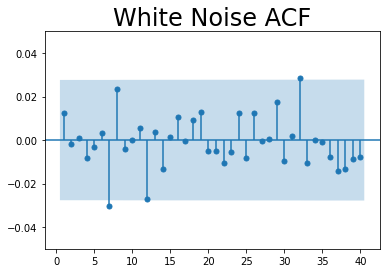

In [15]:
sgt.plot_acf(df.wn, lags=40, zero=False)
plt.title("White Noise ACF", size=24)
plt.ylim((-0.05,0.05))
plt.show()

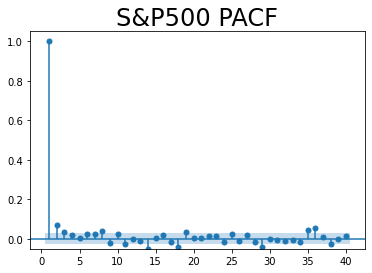

In [16]:
sgt.plot_pacf(df.price, lags=40, zero=False, method=('ols'))
plt.title("S&P500 PACF", size=24)
plt.ylim((-0.05,1.05))
plt.show()

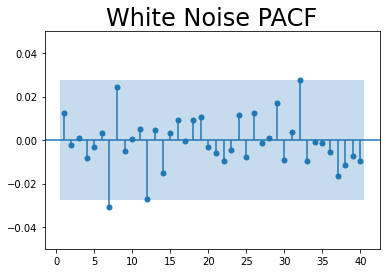

In [17]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('ols'))
plt.title("White Noise PACF", size=24)
plt.ylim((-0.05,0.05))
plt.show()